In [ ]:
%matplotlib inline


Basic Atlas plotting
=======================

Plot the regions of a reference atlas (here the Automated Anatomical Labeling atlas).



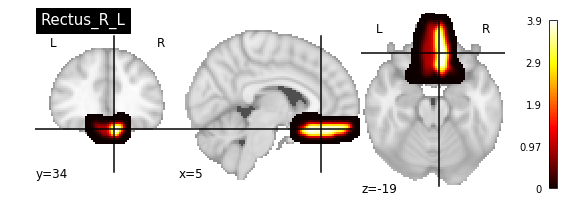

In [123]:
from nilearn import datasets, image, plotting

# Retrieve the AAL atlas
aal_atlas = datasets.fetch_atlas_aal('SPM12')

# Now find the position of the Rectus_R in the list of region
# labels, and use the corresponding list of indices of the image to
# convert it to the index value in the map
rectus_r_idx = aal_atlas.indices[aal_atlas.labels.index('Rectus_R')]
rectus_l_idx = aal_atlas.indices[aal_atlas.labels.index('Rectus_L')]

# Select only the voxels of the map for which the value is equal to the
# this index.
rectus_r_map = image.math_img('(img == %s) * 3.96' % rectus_r_idx,
                              img=aal_atlas.maps)
rectus_l_map = image.math_img('img == %s' % rectus_l_idx,
                              img=aal_atlas.maps)
maps = [rectus_r_map, rectus_l_map]
rectus_map = image.math_img("img1 + img2",
                            img1=rectus_r_map, img2=rectus_l_map, img3=rectus_r_map)
rectus_map = image.smooth_img(rectus_map, fwhm=5)
# The resulting map is a binay map that contains only the Rectus_R, we
# can plot it.
plotting.plot_stat_map(rectus_map, title='Rectus_R_L')